In [36]:
#importing libraries

import re
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [37]:
#loading csv file in a dataframe
df = pd.read_csv('C:\\Users\\THIS PC\\Documents\\Python Scripts\\playlist_2010to2022.csv')

# Basic processing of data

In [3]:
#printing no. of rows and columns
print('no of rows:' , df.shape[0] , 'no of columns:' , df.shape[1])

no of rows: 2300 no of columns: 23


In [38]:
#first 5 rows of dataset
df.head(5)

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [39]:
#prints all columns in dataset
df.columns

Index(['playlist_url', 'year', 'track_id', 'track_name', 'track_popularity',
       'album', 'artist_id', 'artist_name', 'artist_genres',
       'artist_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [40]:
#prints datatypes of the columns
df.dtypes

playlist_url          object
year                   int64
track_id              object
track_name            object
track_popularity       int64
album                 object
artist_id             object
artist_name           object
artist_genres         object
artist_popularity      int64
danceability         float64
energy               float64
key                  float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
time_signature       float64
dtype: object

In [41]:
#prints basis statistics for all the numerical columns of thedataset
df.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


# Data Cleaning

In [42]:
#dropping some columns that are of no use like the url columns and storing it as the same dataframe

df=df[[#'playlist_url', 
    'year', #'track_id', 
    'track_name', 'track_popularity',
       'album', #'artist_id', 
    'artist_name', 'artist_genres',
       'artist_popularity', 'danceability', 'energy', #'key', 
    'loudness',
       #'mode', 
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']].copy()

In [43]:
#checking if there is any null values in any of the columns
df.isna().sum()

year                 0
track_name           0
track_popularity     0
album                0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
loudness             1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64

In [44]:
#dropping the null rows and making the data clean
df = df.dropna()

In [45]:
#printing again number of rows and columns after cleaning
df.shape

(2299, 18)

# EDA(Exploratory Data Analysis)

Text(0, 0.5, 'Count')

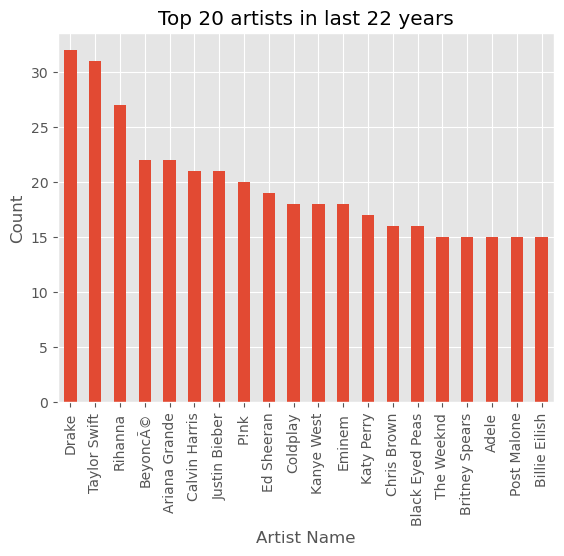

In [46]:
#displays the graph for 20 top artists whose songs have been under top 100 for most number of times
ax=df['artist_name'].value_counts() \
   .head(20)\
   .plot(kind='bar', title='Top 20 artists in last 22 years')
ax.set_xlabel('Artist Name')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

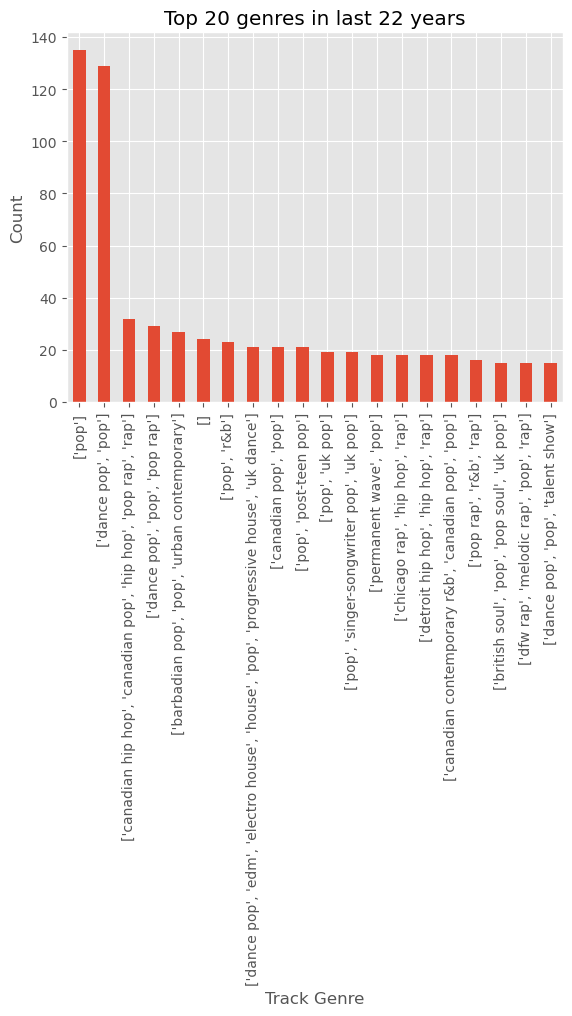

In [13]:
#displays the top 20 genres in dataset
#the data is not clean as we can see there are many tracks that have more than one genre so we need to clean this
ax=df['artist_genres'].value_counts() \
   .head(20)\
   .plot(kind='bar', title='Top 20 genres in last 22 years')
ax.set_xlabel('Track Genre')
ax.set_ylabel('Count')

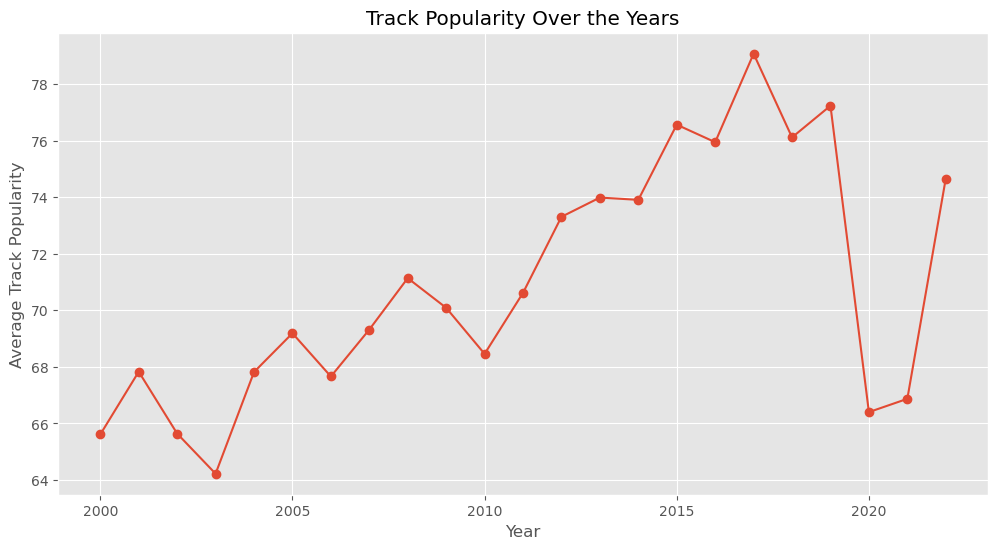

In [47]:
#displays average track popularity over the years

popularity_by_year = df.groupby('year')['track_popularity'].mean()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(popularity_by_year.index, popularity_by_year.values, marker='o', linestyle='-')
plt.title('Track Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Track Popularity')
plt.grid(True)
plt.show()

#### We see a significant dip in the year 2020, this was the year COVID was introduced. There were lockdowns and no artist released their track during this time so the track popularity average reduced

#### also we can see the graph rising again in 2022 because many new songs were released and everything started getting back to normal

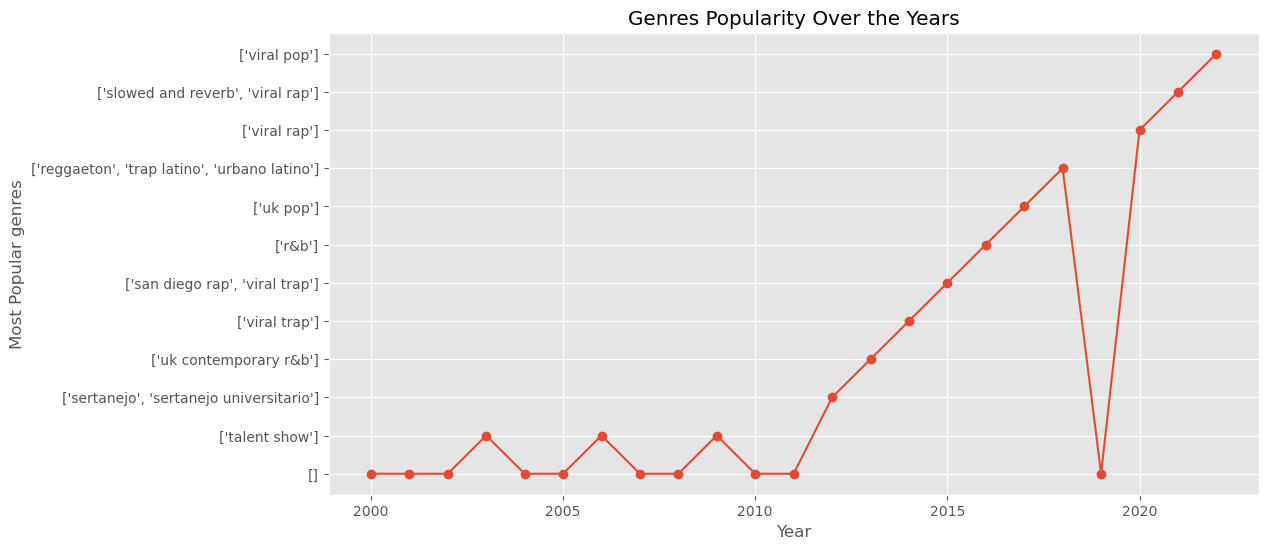

In [48]:
#displays genre popularity over the years
genre_popularity_by_year = df.groupby('year')['artist_genres'].max()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(popularity_by_year.index, genre_popularity_by_year.values, marker='o', linestyle='-')
plt.title('Genres Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Most Popular genres')
plt.grid(True)
plt.show()

In [49]:
artist_popularity_by_year = df.groupby(['year', 'artist_name'])['track_popularity'].sum().reset_index()

most_popular_artists_by_year = artist_popularity_by_year.loc[artist_popularity_by_year.groupby('year')['track_popularity'].idxmax()]

genre_popularity_by_year = df.explode('artist_genres').groupby(['year', 'artist_genres'])['track_popularity'].sum().reset_index()

most_popular_genres_by_year = genre_popularity_by_year.loc[genre_popularity_by_year.groupby('year')['track_popularity'].idxmax()]

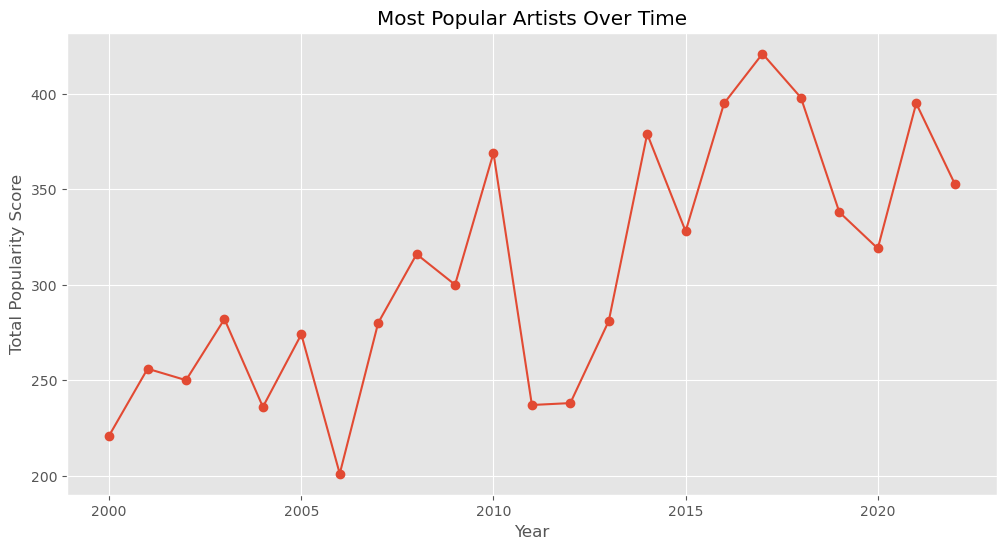

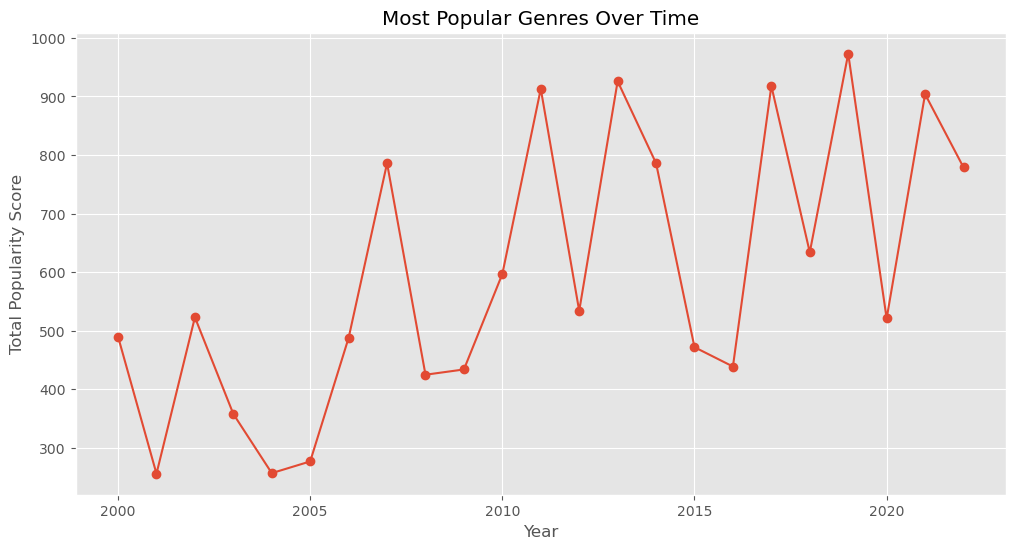

In [50]:
# Plot the most popular artists populatity score by year
plt.figure(figsize=(12, 6))
plt.plot(most_popular_artists_by_year['year'], most_popular_artists_by_year['track_popularity'], marker='o', linestyle='-')
plt.title('Most Popular Artists Over Time')
plt.xlabel('Year')
plt.ylabel('Total Popularity Score')
plt.grid(True)
plt.show()

# Plot the most popular genres total score by year
plt.figure(figsize=(12, 6))
plt.plot(most_popular_genres_by_year['year'], most_popular_genres_by_year['track_popularity'], marker='o', linestyle='-')
plt.title('Most Popular Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Total Popularity Score')
plt.grid(True)
plt.show()

In [51]:
#cleaning the genre column as there are multiple genres used by a single artist
unique_genres = df['artist_genres'].explode().unique()

# Unique time signatures-refers to no. of beats in a measure
unique_time_signatures = df['time_signature'].unique()

# Print the unique genres and time signatures
print("Unique Genres:")
print(unique_genres)

print("\nUnique Time Signatures:")
print(unique_time_signatures)

Unique Genres:
["['permanent wave', 'pop']"
 "['alternative metal', 'modern rock', 'pop punk', 'punk', 'rock', 'socal pop punk']"
 "['contemporary country', 'country', 'country dawn', 'country road']"
 "['alternative metal', 'nu metal', 'post-grunge', 'rap metal', 'rock']"
 "['boy band', 'dance pop', 'pop']"
 "['contemporary r&b', 'dirty south rap', 'hip pop', 'r&b', 'urban contemporary']"
 "['detroit hip hop', 'hip hop', 'rap']" "['dance rock', 'europop']"
 "['dance pop', 'girl group', 'pop', 'r&b', 'urban contemporary']"
 "['alternative rock', 'funk metal', 'funk rock', 'permanent wave', 'rock']"
 "['alternative metal', 'nu metal', 'post-grunge', 'rock']"
 "['g funk', 'gangster rap', 'hip hop', 'rap', 'west coast rap']"
 "['disco house', 'filter house']" "['bouncy house', 'eurodance']"
 "['alternative metal', 'funk metal', 'nu metal', 'post-grunge', 'rap metal', 'rock']"
 "['eurodance', 'italo dance']" '[]'
 "['east coast hip hop', 'gangster rap', 'hip hop', 'pop rap', 'rap']"
 "['ea

Top 20 Most Common Genres:
artist_genres
pop                   993
dance pop             537
rap                   383
pop rap               305
hip hop               250
r&b                   231
urban contemporary    214
trap                  134
southern hip hop      132
modern rock           128
rock                  127
canadian pop          112
edm                   110
hip pop                98
pop dance              92
atl hip hop            91
uk pop                 87
neo mellow             85
gangster rap           83
pop rock               80
Name: count, dtype: int64


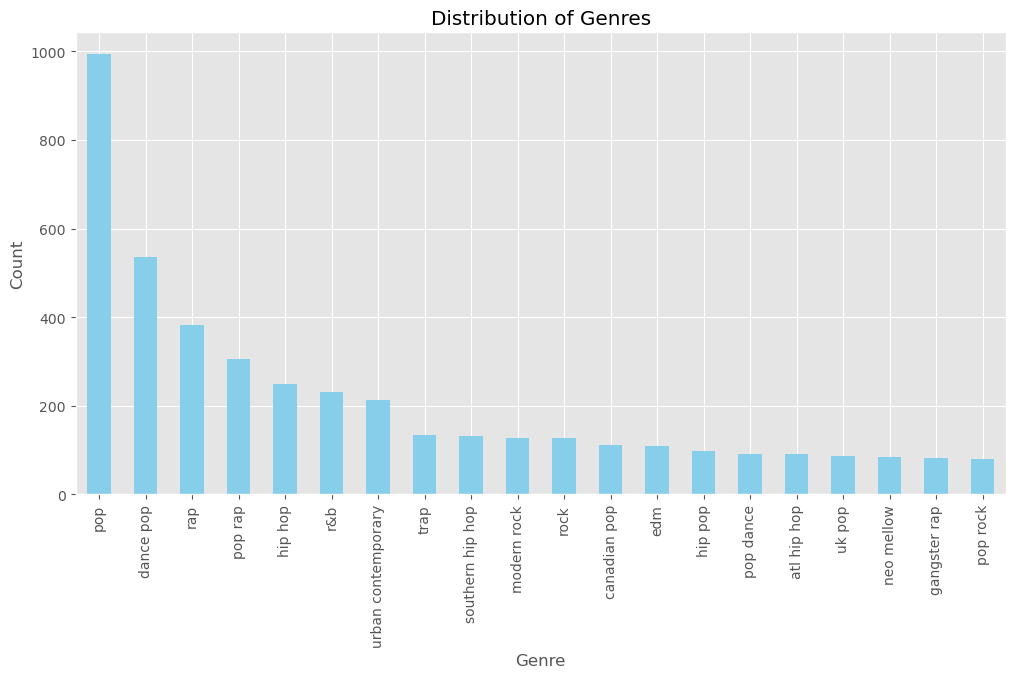

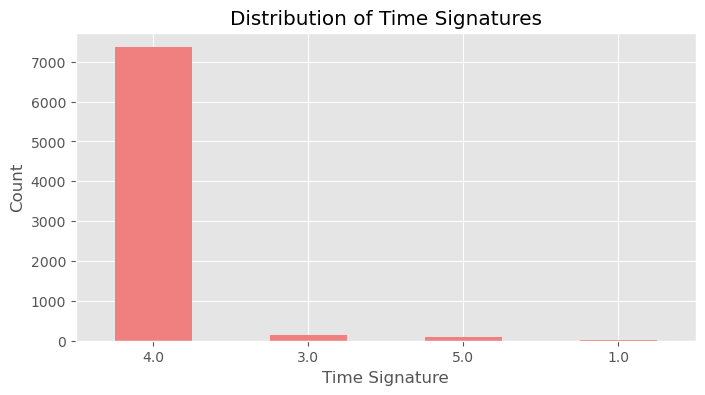

In [52]:
#cleaning the genre column using split and finding the top most common genres
genre_counts = df['artist_genres'].explode().value_counts()
sorted_genres = genre_counts.sort_values(ascending=False)

df['artist_genres'] = df['artist_genres'].apply(lambda st: re.sub("\['|'\]|'|\[\]", "", st).split(", "))
df = df.explode('artist_genres')

# Find the most common genres
top_genres = df['artist_genres'].value_counts().head(20)
print("Top 20 Most Common Genres:")
print(top_genres)

# Create a bar plot for genres
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Count the occurrences of each time signature
time_signature_counts = df['time_signature'].value_counts()

# Create a bar plot for time signatures
plt.figure(figsize=(8, 4))
time_signature_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Time Signatures')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

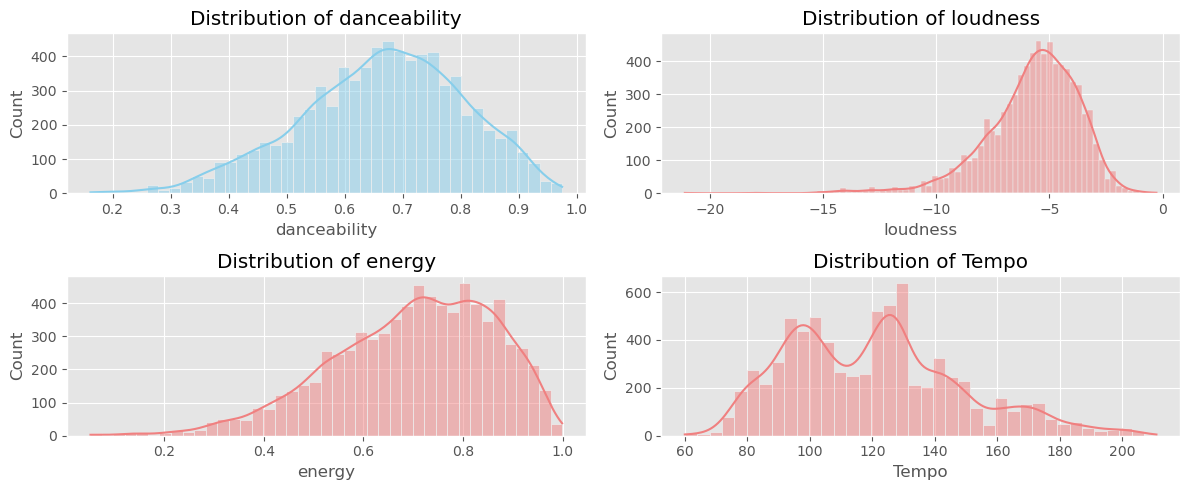

In [53]:
#plotting the main audio features for a track like danceability, loudness, energy, tempo
plt.figure(figsize=(12, 5))

# Create histograms for danceability
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='danceability', kde=True, color='skyblue')
plt.title('Distribution of danceability')
plt.xlabel('danceability')

# Create histograms for loudness
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='loudness', kde=True, color='lightcoral')
plt.title('Distribution of loudness')
plt.xlabel('loudness')

# Create histograms for energy
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='energy', kde=True, color='lightcoral')
plt.title('Distribution of energy')
plt.xlabel('energy')

# Create histograms for tempo
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='tempo', kde=True, color='lightcoral')
plt.title('Distribution of Tempo')
plt.xlabel('Tempo')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The most popular artist is: Taylor Swift
The least popular artist is: Matt Cardle


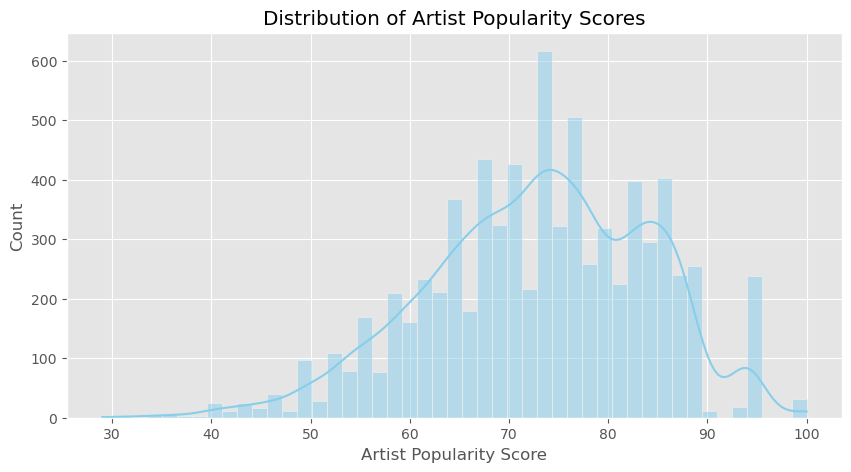

In [56]:
#plotting artist popularity scores
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='artist_popularity', kde=True, color='skyblue')
plt.title('Distribution of Artist Popularity Scores')
plt.xlabel('Artist Popularity Score')

# Find the artist with the highest popularity score
most_popular_artist = df[df['artist_popularity'] == df['artist_popularity'].max()]['artist_name'].values[0]
print(f"The most popular artist is: {most_popular_artist}")

# Find the artist with the lowest popularity score
least_popular_artist = df[df['artist_popularity'] == df['artist_popularity'].min()]['artist_name'].values[0]
print(f"The least popular artist is: {least_popular_artist}")

# Show the plot
plt.show()

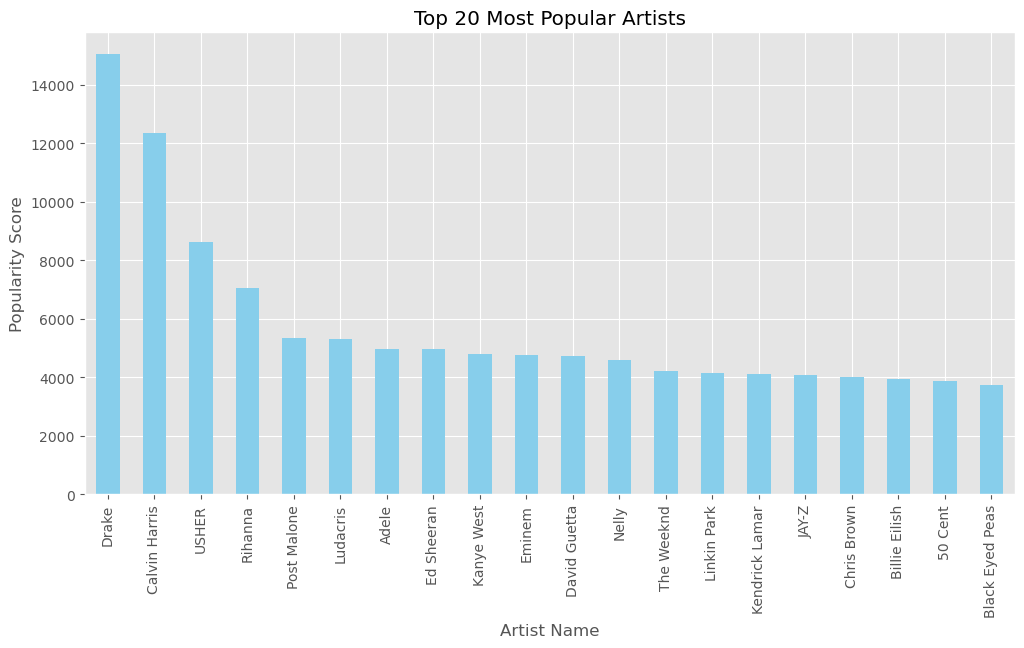

In [55]:
#plotting top 20 most popular artists
artist_popularity = df.groupby('artist_name')['artist_popularity'].sum()

# Sort the artists by popularity in descending order and select the top 20
top_20_artists = artist_popularity.sort_values(ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_20_artists.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Popular Artists')
plt.xlabel('Artist Name')
plt.ylabel('Popularity Score')
plt.xticks(rotation=90)
plt.show()

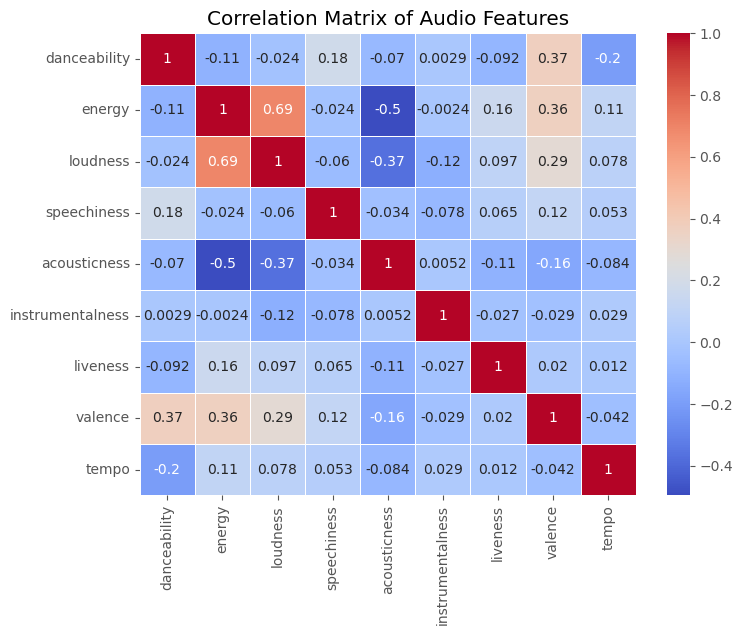

In [23]:
#plotting a correlation matrix to understand how audio features are related to each other
audio_features = ['danceability', 'energy', 'loudness','speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo',  ]

correlation_matrix = df[audio_features].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Audio Features')
plt.show()

## Correlation Matrix:

- positive correlation-if two audio features have positive correlation then they are directly proportional to each other ex: energy and loudness have a correlation of 0.69, if energy increases then loudness increases 0.69 times.

- negative correlation-if two audio features have negative correlation then they are inversely proportional to each other ex: energy and acousticness have a correlation of -0.5, if energy increases then acousticness decreases. 

- no correlation-if two audio features have correlation close to 0 then they both have no linear relationship, we can leve these features out.

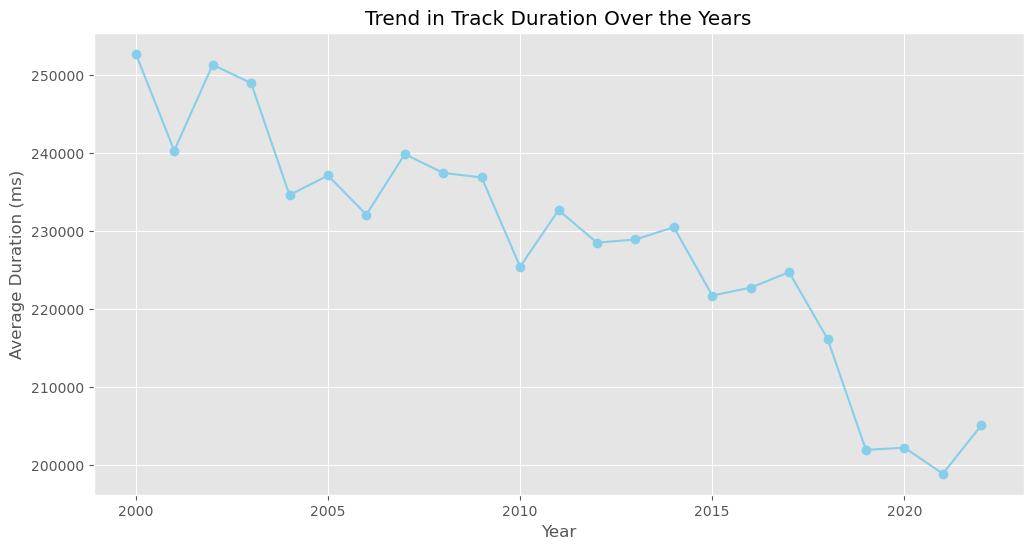

In [24]:
#plotting the trend in track duration in milliseconds over the years
duration_trends = df.groupby('year')['duration_ms'].describe()
plt.figure(figsize=(12, 6))
plt.plot(duration_trends.index, duration_trends['mean'], marker='o', linestyle='-', color='skyblue')
plt.title('Trend in Track Duration Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (ms)')
plt.grid(True)
plt.show()

People started preferring shorter songs as the time passed, depicted in the above graph.

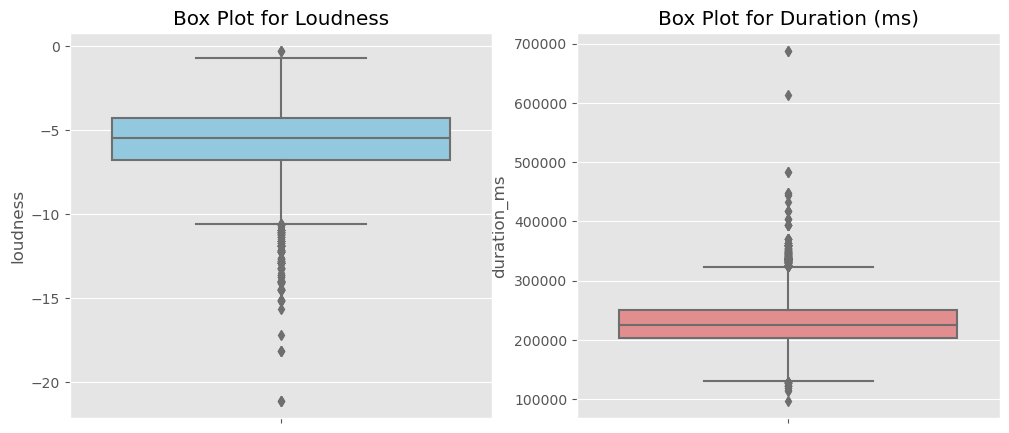

In [25]:
#plotting a box plot for loudness and duration(ms)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='loudness', color='skyblue')
plt.title('Box Plot for Loudness')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='duration_ms', color='lightcoral')
plt.title('Box Plot for Duration (ms)')

# Show the plots
plt.show()

The box plots shows that maximum amount of data is in which range 
here, for loudness it is between -7 to -4 db and for track duration it is 200000ms to 250000ms.